In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Подготовка данных

In [2]:
with np.load('mnist.npz', allow_pickle=True) as f: 
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


label is 4


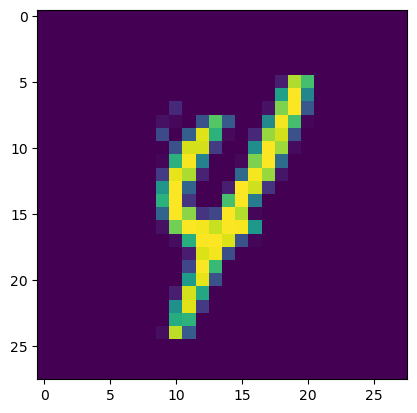

In [3]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [4]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


### Мотивация: настройка параметров влияет на качество

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


Вывод: В зависимости от количества соседей в методе kNN качество может существенно отличаться!

### Задания

#### Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier.
В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

#### Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy


#### Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность?
Задача не является обязательной, в качестве решения необходимо предоставить код с решением

#### Ноутбук с решением необходимо сдать отправить боту @ml2022sharebot c пометкой seminar03

### Решение задачи 1

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 5, 10, 15, 20],
}

classifier = KNeighborsClassifier()
grid = GridSearchCV(
    classifier, 
    params, 
    cv=3, 
    scoring='accuracy', 
    return_train_score=False, 
    verbose=1, 
    )

In [14]:
grid.fit(train_x_1, train_y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 5, 10, 15, 20],
                         'n_neighbors': [3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}
0.9703500000000002


In [16]:
best_classifier = KNeighborsClassifier(
    n_neighbors=4,
    leaf_size=1,
    weights='distance'
)

In [17]:
best_classifier.fit(train_x_1, train_y)

KNeighborsClassifier(leaf_size=1, n_neighbors=4, weights='distance')

In [35]:
preds = best_classifier.predict(test_x_1)
print(accuracy_score(preds, test_y))

0.9714


In [18]:
# сохраните параметры лучшего классификатора
with open("knn_best_params.pkl", "wb") as f:
    pickle.dump(best_classifier.get_params(), f)

### Решение задачи 2

In [6]:
from sklearn.cluster import KMeans

In [6]:
k_means = KMeans(n_clusters=1)

In [7]:
etalons_10 = np.zeros((10, 784))
for i in range(10):
    etalons_10[i] = k_means.fit(train_x_1[train_y == i]).cluster_centers_

In [11]:
clf = KNeighborsClassifier(
    n_neighbors=4,
    leaf_size=1,
    weights='distance'
)

In [12]:
etalons_10_y = np.array(range(10))

In [13]:
clf.fit(etalons_10, etalons_10_y)

KNeighborsClassifier(leaf_size=1, n_neighbors=4, weights='distance')

In [14]:
preds = clf.predict(test_x_1)
print(accuracy_score(preds, test_y))

0.8203


In [15]:
np.save('knn_10_best', etalons_10)

### Решение задачи 3

In [7]:
for k in range(1, 10):
    etalons = np.zeros((10 * k, 784))
    etalons_y = np.tile(range(10), k)
    k_means = KMeans(n_clusters=k)
    for i in range(10):
        centrs = k_means.fit(train_x_1[train_y == i]).cluster_centers_
        for j in range(k):
            etalons[i + 10 * j] = centrs[j]
    clf = KNeighborsClassifier(
        n_neighbors=4,
        leaf_size=1,
        weights='distance'
    )
    clf.fit(etalons, etalons_y)
    preds = clf.predict(test_x_1)
    print(f"{k}-etalons: ", accuracy_score(preds, test_y))

1-etalons:  0.8203
2-etalons:  0.79
3-etalons:  0.823
4-etalons:  0.8452
5-etalons:  0.8576
6-etalons:  0.8713
7-etalons:  0.885
8-etalons:  0.8927
9-etalons:  0.9004
